In [9]:
import pickle
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Importing Dataset

In [10]:
with open('dataset.pickle', 'rb') as handle:
    data = pickle.load(handle)

X = data['X']
y = data['y']

X.shape, y.shape

((600, 42), (600,))

## Preprocessing

In [11]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

## Splitting Dataset into training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((480, 42), (480, 3), (120, 42), (120, 3))

## Training

In [13]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluating

In [14]:
y_pred = [np.argmax(x) for x in clf.predict(X_test)]
y_true= [np.argmax(x) for x in y_test]
score = accuracy_score(y_true=y_true, y_pred=y_pred)
print('The test score is', score*100)

The test score is 100.0


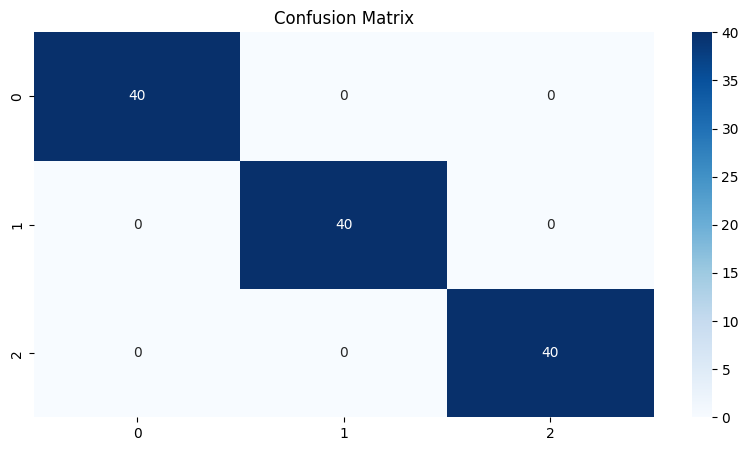

In [15]:
_, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data=confusion_matrix(y_true=y_true, y_pred=y_pred), 
            annot=True, ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Saving the model

In [16]:
with open('model.pickle', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)